In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib inline

In [2]:
df_train = pd.read_csv('C:\\Users\\신태경\\KaggleStudy\\Titanic\\train.csv')
df_test = pd.read_csv('C:\\Users\\신태경\\KaggleStudy\\Titanic\\test.csv')

df_train.head()

In [3]:
# 각 feature가 가진 통계치 체크
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,2.947868,1.839713
std,120.810458,0.841838,14.181209,0.896760,0.981429,1.006656,1.519072
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,2.066331,1.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,2.670985,1.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,3.449988,2.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,6.238967,11.000000


테이블에서 보다시피, PassengerID 숫자와 다른, 그러니까 null data가 존재하는 feature가 있는 것 같습니다.  
이를 좀 더 보기 편하도록 그래프로 시각화해서 살펴봅시다.

### Null data check

In [5]:
###########
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [6]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


Age, Cabin, Embarked 에서 null data가 존재하는 것을 확인할 수 있습니다.  
MANO 라이브러리를 사용하면 null data를 좀 더 쉽게 체크하 수 있습니다

<AxesSubplot:>

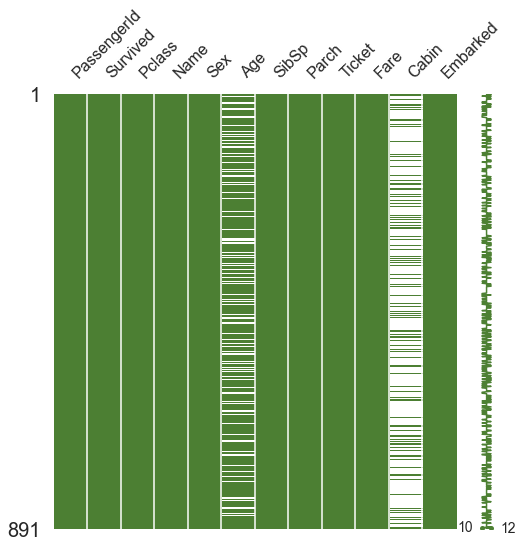

In [7]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color=(0.3, 0.5, 0.2))

<AxesSubplot:>

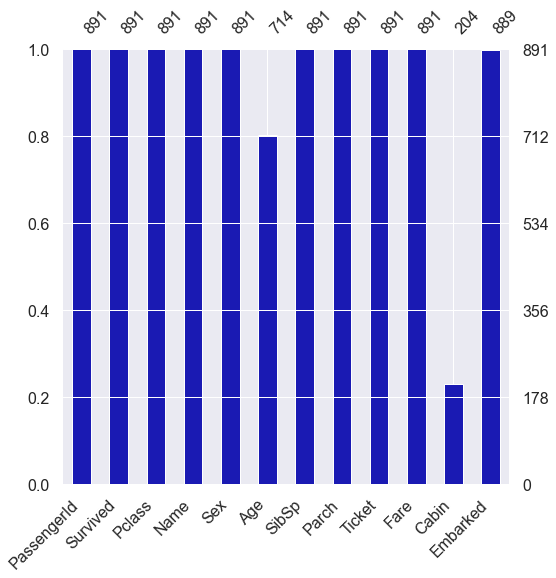

In [8]:
msno.bar(df=df_train.iloc[:, :], figsize=(8,8), color=(0.1, 0.1, 0.7))

<AxesSubplot:>

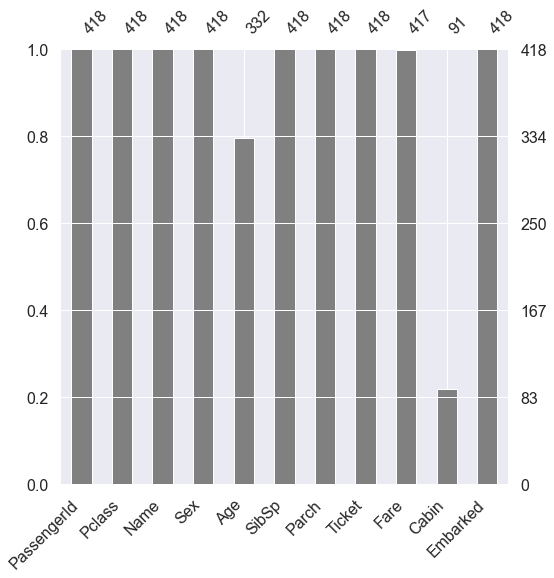

In [9]:
msno.bar(df=df_test.iloc[:, :], figsize=(8,8), color=(0.5, 0.5, 0.5))

### Target label 확인
target label이 어떤 distribution을 가지고 있는지 확인해 봐야 합니다.  
binary classification 문제의 경우에서 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있습니다.

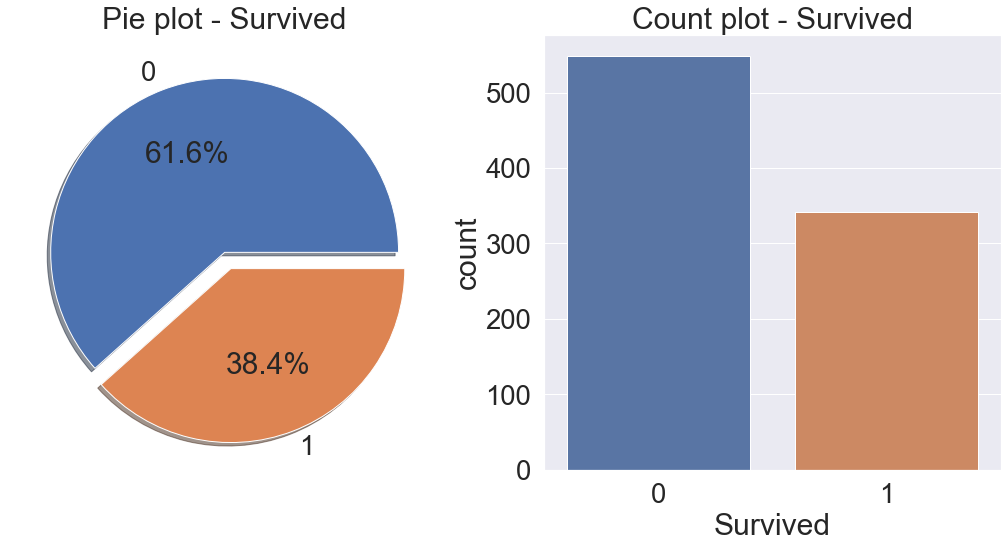

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

죽은 사람은 0, 산 사람은 1입니다.  
38.4%가 살아남았습니다.  
target label의 분포가 제법 균일(balanced)합니다. 불균일한 경우, 예를 들어서 100 중 1이 99, 0이 1개인 경우에는 모델이 모든 것을 1이라고 해도 정확도가 99%가 나오게 됩니다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됩니다. 지금은 이와 같이 imbalanced 하지 않으니 계속해서 진행합니다.

## Exploratory data analysis
이제 본격적으로 데이터 분석을 진행합니다. 데이터는 매우 많습니다. 이 많은 데이터 안에 숨겨진 정보를 찾기 위해서는 적절한 시각화가 필요합니다.  
시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있습니다. 특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하면 편합니다.

### Pclass

먼저 Pclass 데이터에 대해서 살펴보겠습니다. Pclass는 ordinal, 서수형 데이터입니다. 카테고리이면서 순서가 있는 데이터 타입입니다.  
먼저 Pclass에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe에서는 groupby를 사용하면 쉽게 할 수 있습니다. 또한 pivot이라는 메소드도 있습니다.  
'Pclass', 'Survival'을 가져온 후 pclass로 묶습니다. 그리고 나면 각 plcass마다 0, 1이 카운트 되는데 이를 평균내면 각 plcass별 생존률이 나옵니다.  
아래와 같이 count()를 하면 각 class에 몇명이 있는지 확인할 수 있으며 sum()을 하면 216명 중 생존한(survived=1) 사람의 총 합을 주게 됩니다.

In [11]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


pandas의 crosstab을 사용하면 이와 같은 과정을 좀 더 수월하게 볼 수 있습니다.

In [13]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

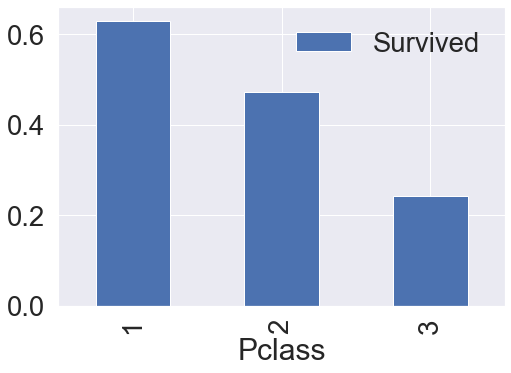

In [14]:
# 평균 구하기
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

그래프를 보면 Pclass가 좋을 수록 생존률이 높은 것을 확인할 수 있습니다.  
좀 더 보기 쉽게 seaborn의 countplot을 이용해 label의 개수를 확인해 보겠습니다.

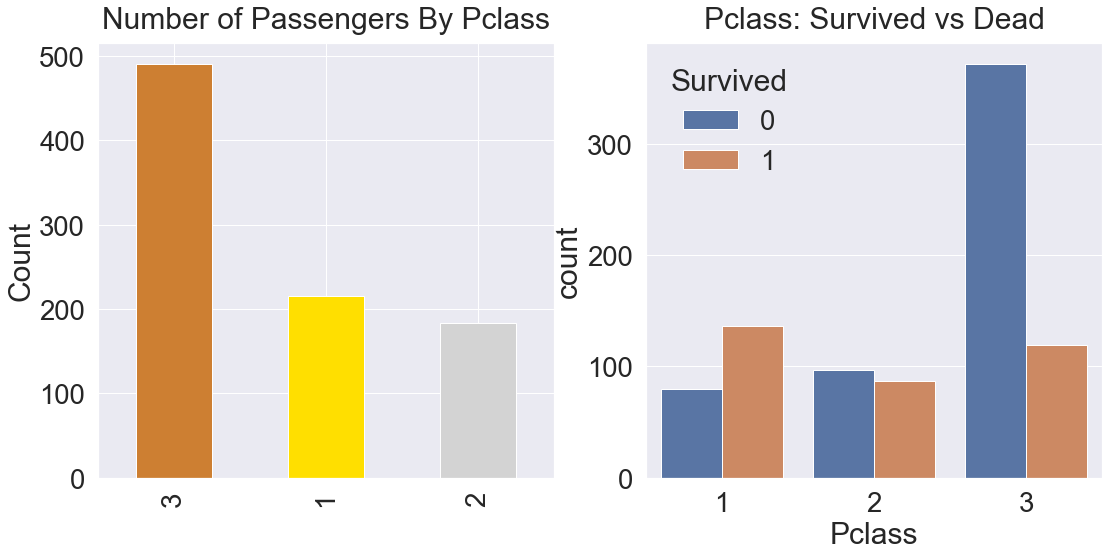

In [15]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

* 클래스가 높을 수록 생존 확률이 높은 것을 확인할 수 있습니다.
* 우리는 생존에 Pclass가 큰 영향을 미친다고 생각해볼 수 있으며, 나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라고 판단할 수 있습니다.

### Sex
* 이번에는 성별에 따라 생존률이 어떻게 달라지는지 확인해 보겠습니다.
* 마찬가지로 pandas groupby와 seaborn countplot을 사용해서 시각화를 진행하겠습니다.

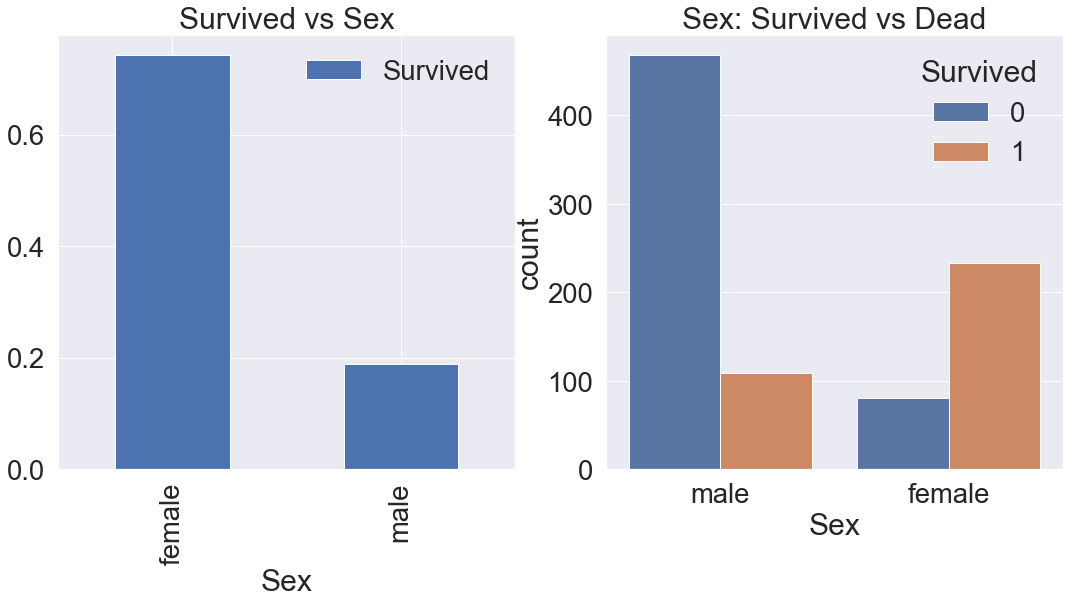

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

여자가 생존할 확률이 높습니다.

In [17]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Pclass와 마찬가지로 Sex 또한 예측 모델에 쓰일 중요한 feature임을 알 수 있습니다.

### Both Sex and Pclass
* Sex, Pclass 두 가지에 대해서 생존이 어떻게 달라지는지 확인해 봅시다.
* seaborn의 facktorplot을 이용하면 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있습니다.

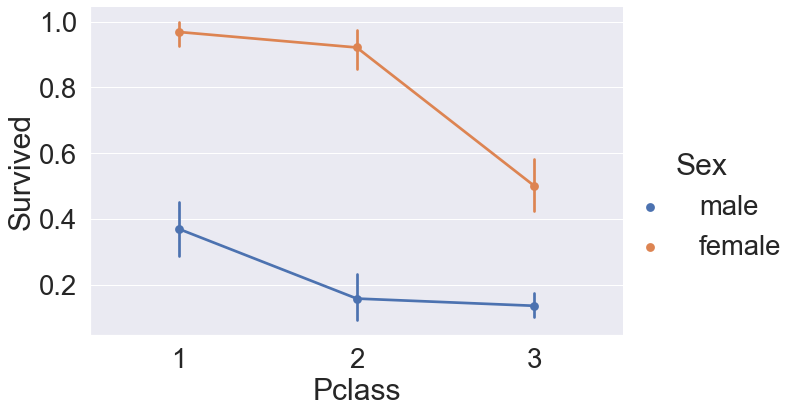

In [19]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

* 모든 클래스에서 female이 살 확률이 male보다 높은 걸 알 수 있습니다.  
* 또한 남자, 여자 상관 없이 클래스가 높을 수록 살 확률이 높습니다.  
* 위 그래프는 hue 대신 column으로 하면 아래와 같아집니다.

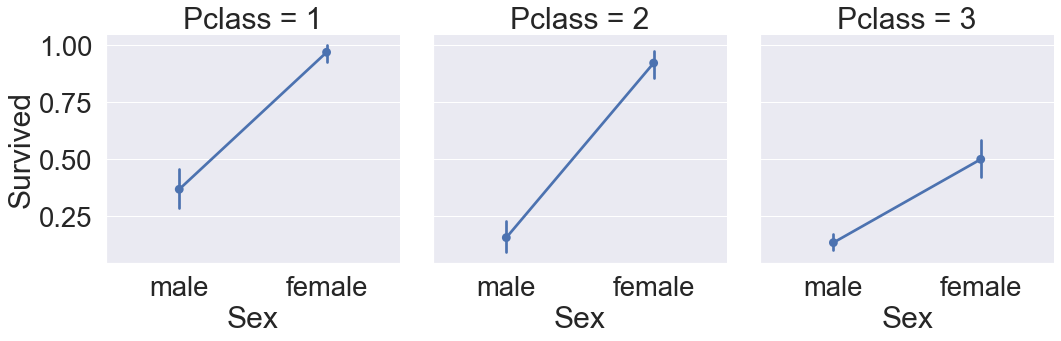

In [20]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, saturation=3, size=5, axpect=1)

### Age

In [21]:
print('제일 나이가 많은 탑승객: {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이가 많은 탑승객: 80.0 Years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


생존에 따른 Age의 histogram을 그려보겠습니다.

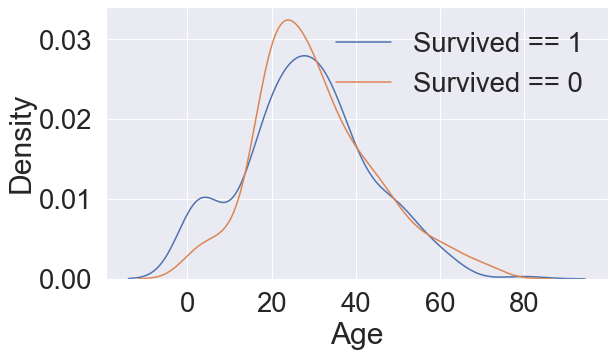

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

보시다시피 생존자 중 나이가 어린 경우가 많음을 볼 수 있습니다. (20-30대)

In [23]:
df_train['Age'][df_train['Pclass']==1]

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 216, dtype: float64

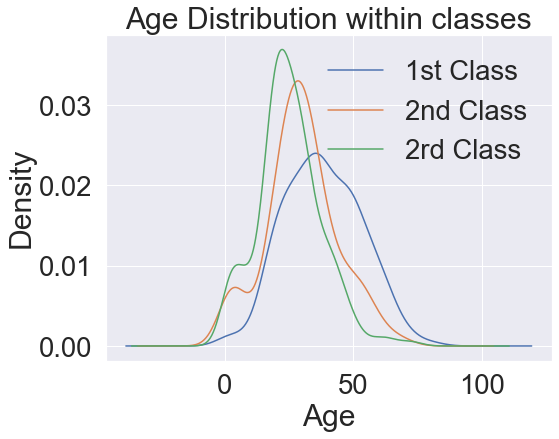

In [24]:
# Age distribution within classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '2rd Class'])

class가 높을 수록 나이 많은 사람의 비중이 커짐

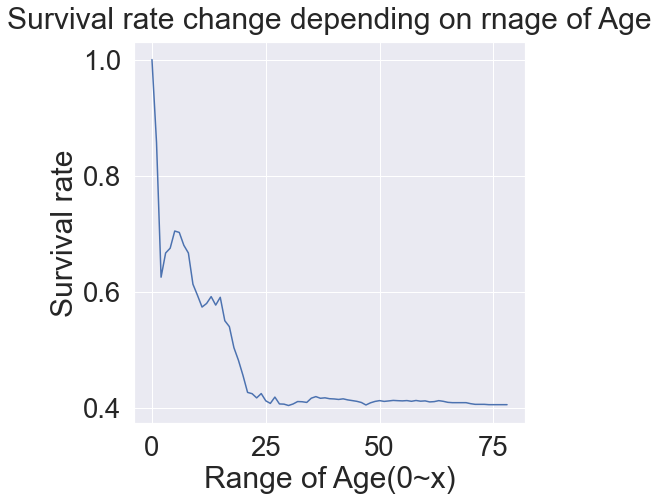

In [25]:
############### 그래프가 어떻게 그려지는지 모르겠음
# 나이대가 변함에 따라 생존률의 변화를 살펴봅니다
cummulate_survival_ratio = []

for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on rnage of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

* 나이가 어릴 수록 생존률이 높은 것을 확인할 수 있습니다.
* 이 나이가 중요한 feature로 쓰일 수 있을듯 합니다.

### Pclass, Sex, Age
* 지금까지 살펴본 feature와 Survived의 관계에 대해서 파악하고자 할 때는 seaborn의 violinplot을 사용하면 좋습니다.
* x축은 우리가 나눠서 보고싶어 하는 case를 나타내며 y축은 보고 싶어하는 distribution입니다.

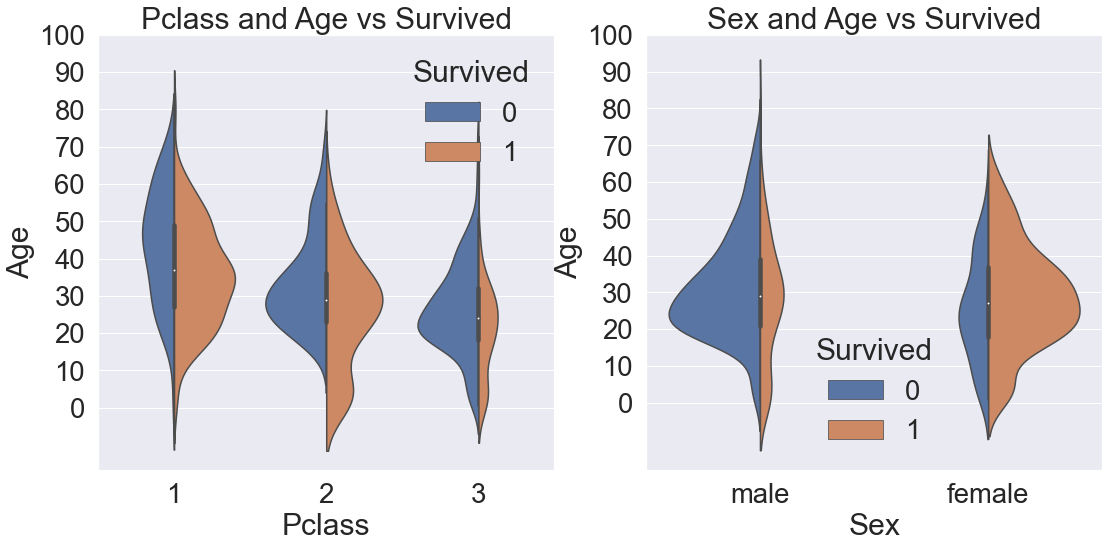

In [26]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex", "Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

* 왼쪽 그림은 Pclass 별로 Age의 distribution이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프입니다.
* 오른쪽 그림도 마찬가지 Sex, 생존에 따른 distribution이 어떻게 다른지 보여주는 그래프입니다.  
* 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한 것을 볼 수 있습니다.
* 오른쪽 그림에서 보면 여자가 생존을 더 많이 한 것을 볼 수 있습니다.
* 여성과 아이를 먼저 챙긴 것을 볼 수 있습니다.

### Embarked
* Embarked는 탑승한 항구를 나타냅니다.

In [39]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<AxesSubplot:xlabel='Embarked'>

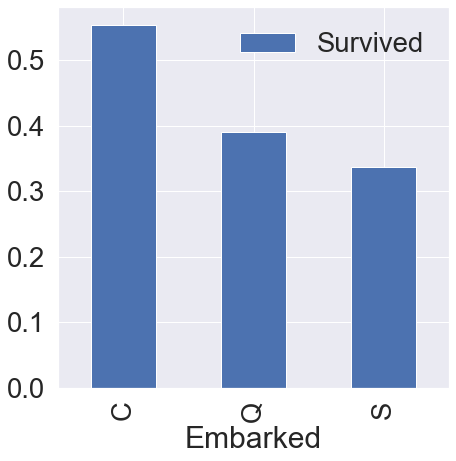

In [27]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

* 생존률은 조금의 차이가 있지만 비슷한 것 같습니다. C가 제일 높습니다.
* 모델에 큰 영향을 미칠지는 모르지만 사용해 보도록 하겠습니다.
* 모델을 만들고 나면 사용한 feature들이 얼마나 중요한 역할을 했는지 확인해볼 수 있습니다. 이는 추후에 살펴보도록 하겠습니다.

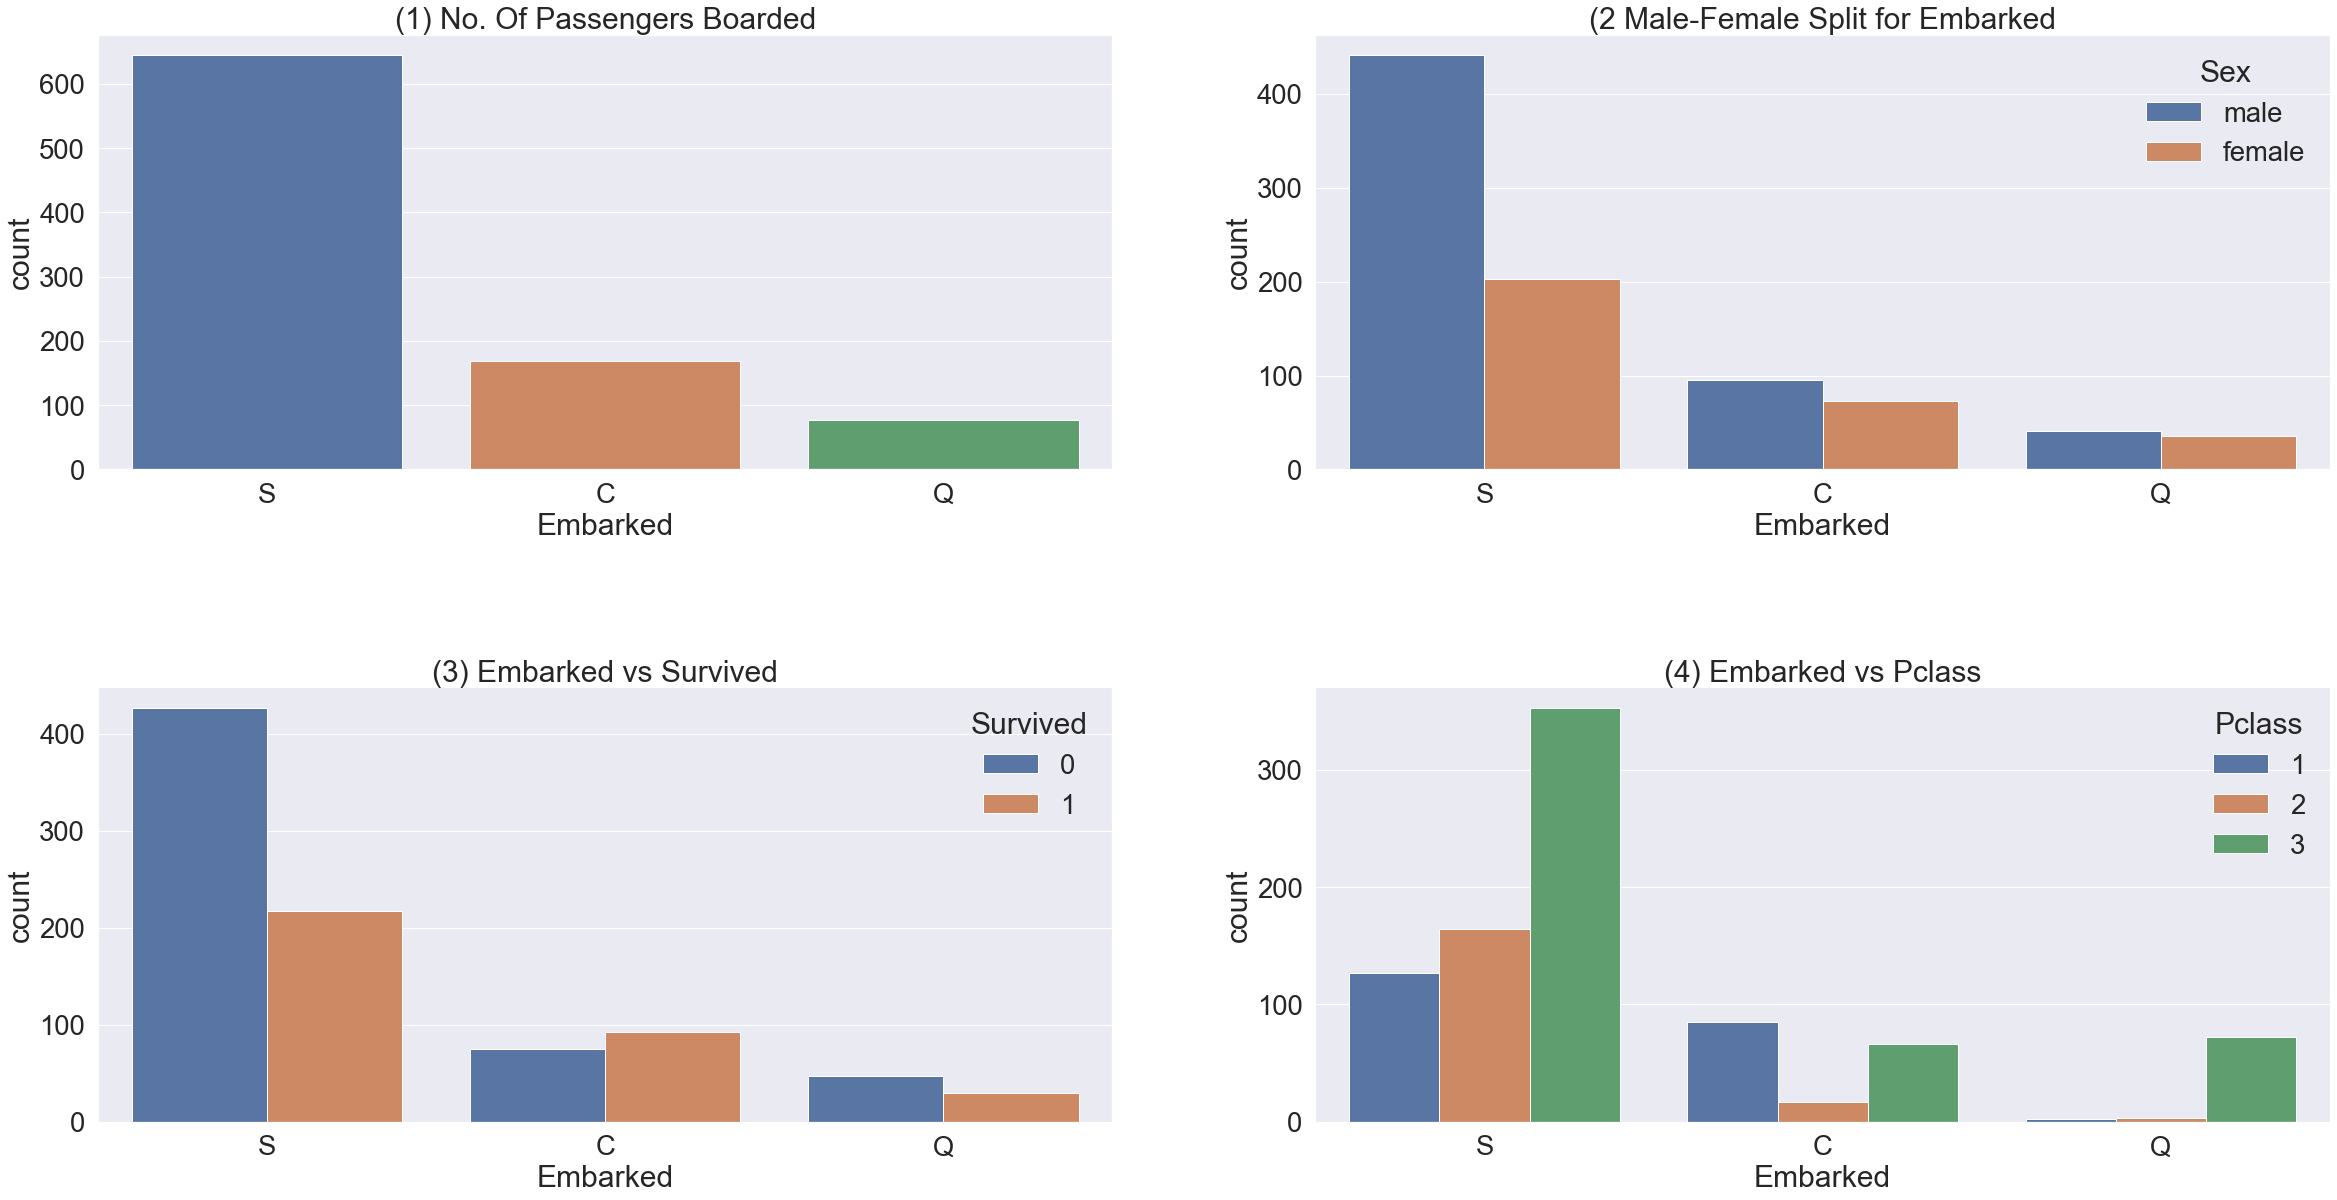

In [48]:
f, ax = plt.subplots(2, 2, figsize=(40,20))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2 Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* Figure1 - 전체적으로 봤을 때 S에서 가장 많은 사람이 탑승했습니다.
* Figure2 - C와 Q는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.
* Figure3 - 생존확률이 S의 경우 많이 낮은 것을 볼 수 있습니다.
* Figure4 - Class로 split해서 보니 C가 생존확률이 높은 건 클래스가 높은 사람이 많이 타서 그런듯 합니다. S는 3rd Class가 많아서 생존 확률이 낮게 나옵니다.

### Family - SibSp(형제자매) + Parch(부모, 자녀)
SibSp와 Parch를 합하면 Family가 될 것입니다. Family로 합쳐서 분석해 보겠습니다.

In [54]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야 하니 1을 더합니다.
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [55]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


Family와 생존의 관계를 한번 살펴봅시다.

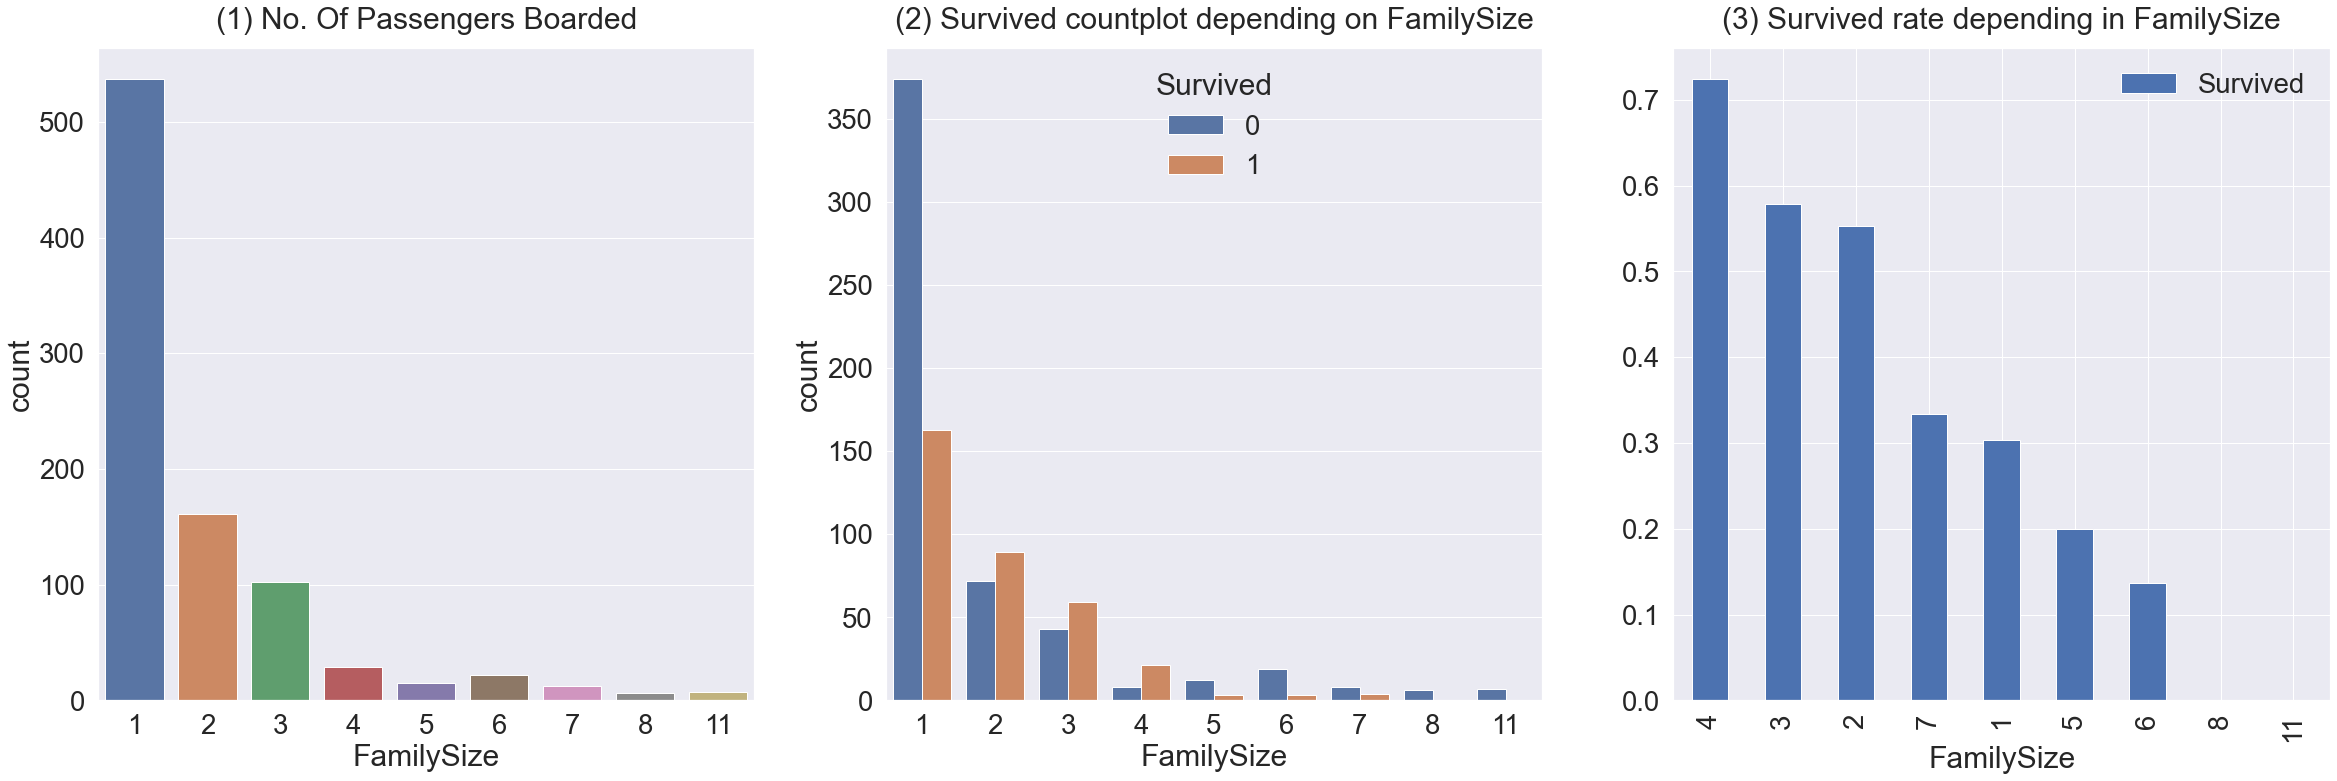

In [37]:
f, ax = plt.subplots(1,3,figsize=(40,12))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending in FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* Figure1 - 가족 크기가 1-11까지 있음을 볼 수 있습니다.
* Figure2 - 가족이 4명인 경우가 가장 생존확률이 높습니다. 가족 수가 많아질 수록 (5명 이상) 생존 확률이 낮아집니다. 가족 수가 너무 작아도(1) 그렇습니다.

### Fare
Fare은 탑승요금이며 contios feature입니다.

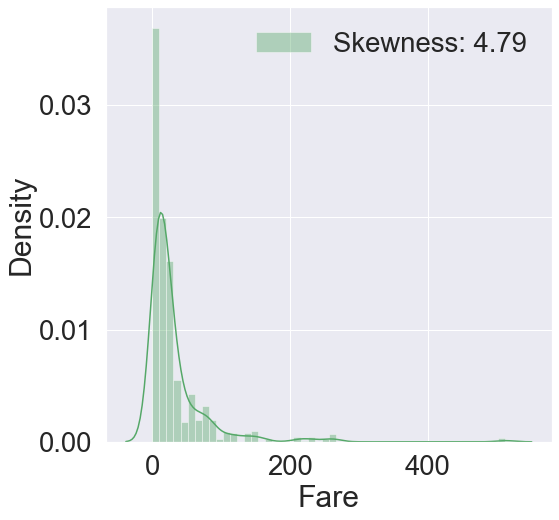

In [32]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='g', label='Skewness: {:.2f}'
                 .format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

* distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness) 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. 몇 개 없는 outlier에 대해서 너무 민감하게 반응한다면 실제 예측 시 좋지 못한 결과를 부를 수 있습니다.
* outlier의 영향을 줄이기 위해 Fare에 log를 취해주겠습니다.
* dataFrame의 특정 column에 공통된 작업(함수)를 적용하고 싶다면 map, apply를 사용할 수 있습니다.
* 원하는 것은 Fare columns의 데이터 모두에 대해 log를 적용하는 것입니다. lambda, map을 이용하면 함수를 iteration할 수 있습니다.

In [33]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # test dataset에 있는 nan value를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

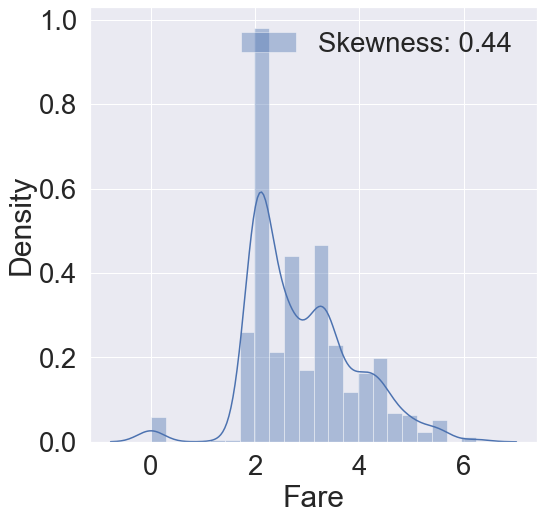

In [34]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

* log를 취해주니 비대칭성이 많이 사라졌습니다. 이렇게 되면 모델이 좀 더 좋은 성능을 낼 수 있습니다.

### Cabin
* 해당 feature의 경우 NaN 값이 80%에 달하므로 생존에 영향을 미칠 중요한 정보를 얻어내기 쉽지 않을듯 합니다.
* 그러므로 모델에 포함시키지 않겠습니다.

In [35]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


### Ticket
* 해당 feature은 NaN 값이 없습니다. 일단 string data이므로 일련의 작업을 수행해야 합니다.

In [36]:
df_train['Ticket'].value_counts()

CA. 2343       7
347082         7
1601           7
347088         6
CA 2144        6
              ..
8471           1
4138           1
13567          1
237671         1
W.E.P. 5734    1
Name: Ticket, Length: 681, dtype: int64

* ticket number은 매우 다양합니다. 여기서 어떤 특징을 이끌어내 생존과 연결시킬 수 있을까요?
* 이것은 튜토리얼이니 일단 ticket은 넘어가도록 하겠습니다.